In [7]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')
nltk.download('wordnet')
from PIL import Image
import wikipedia
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = pd.read_csv('data/SnapChat_reviews.csv')

In [9]:
df.head()

,Date,Rating,Helpful,Review
0,19-Nov-19,4,0,Very Best camera and chat app🔥👍👍
1,19-Nov-19,5,0,I love love love this app🥰 its its amazingly e...
2,19-Nov-19,1,5,Broken joke of an app. Nothing else to it
3,19-Nov-19,5,0,One of the best texting a call apps out there
4,19-Nov-19,1,0,Have to download it again and again so that th...


In [10]:
df.shape

(32875, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32875 entries, 0 to 32874
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     32875 non-null  object
 1   Rating   32875 non-null  int64 
 2   Helpful  32875 non-null  int64 
 3   Review   32875 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [12]:
df.Review.head()

0                     Very Best camera and chat app🔥👍👍
1    I love love love this app🥰 its its amazingly e...
2            Broken joke of an app. Nothing else to it
3        One of the best texting a call apps out there
4    Have to download it again and again so that th...
Name: Review, dtype: object

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [15]:
df['Review'] = df['Review'].str.replace('[^\w\s]', "")
df.Review.head(5)

C:\Users\Sandra\AppData\Local\Temp/ipykernel_11944/3778351670.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]', "")


0                        very best camera and chat app
1    i love love love this app its its amazingly ea...
2             broken joke of an app nothing else to it
3        one of the best texting a call apps out there
4    have to download it again and again so that th...
Name: Review, dtype: object

In [16]:
string = "yikes the app is awesome "

In [17]:
print(string.replace("awesome", "Cool"))

yikes the app is Cool 


In [18]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Review.head()

0                                 best camera chat app
1    love love love app amazingly easy chat friends...
2                         broken joke app nothing else
3                           one best texting call apps
4    download profiles get loaded theres bugnot qui...
Name: Review, dtype: object

In [19]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Review.head()

0                                 best camera chat app
1    love love love app amazingly easy chat friend ...
2                         broken joke app nothing else
3                           one best texting call apps
4    download profile get loaded there bugnot quite...
Name: Review, dtype: object

In [20]:
import sys
print(sys.executable)

C:\Users\Sandra\anaconda3\python.exe


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns

In [23]:
df.columns

Index(['Date', 'Rating', 'Helpful', 'Review'], dtype='object')

In [24]:
df.Rating.value_counts()

1    10326
5     8486
3     4999
4     4555
2     4509
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

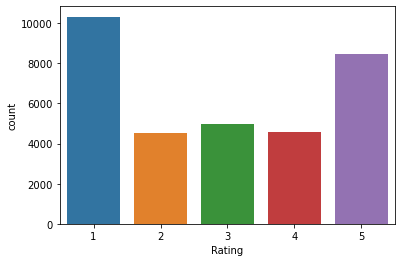

In [25]:
sns.countplot(data = df, x = 'Rating')

In [26]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [27]:
rating_1 = reviews[reviews['Rating'] == 1]
rating_2 = reviews[reviews['Rating'] == 2]
rating_3 = reviews[reviews['Rating'] == 3]
rating_4 = reviews[reviews['Rating'] == 4]
rating_5 = reviews[reviews['Rating'] == 5]

In [45]:
sample_reviews = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis=0)
sample_reviews.reset_index(drop=True,inplace=True)

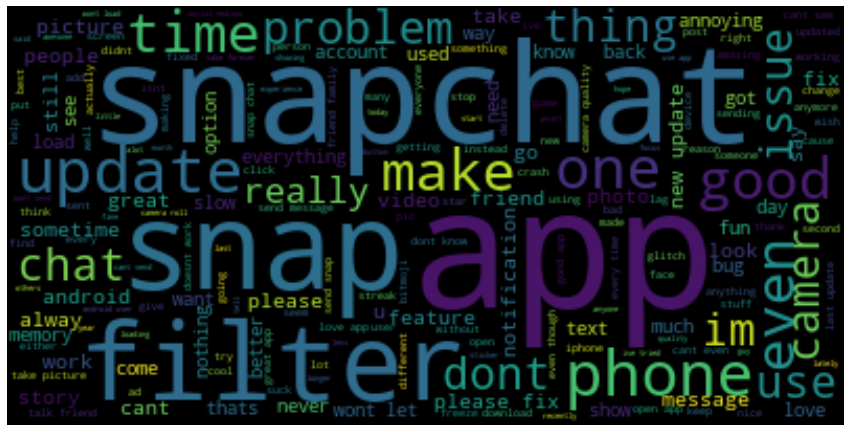

In [54]:
#Wordcloud function's input needs to be a single string of text.
reviews_str = sample_reviews.Review.str.cat()
wordcloud = WordCloud(background_color='black').generate(reviews_str)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
# Data is split into Negative Reviews(rating 1 or 2) and Positive Reviews(rating4 or 5)
negative_reviews = sample_reviews[sample_reviews['Rating'].isin([1,2]) ]
positive_reviews = sample_reviews[sample_reviews['Rating'].isin([4,5]) ]
neutral_reviews = sample_reviews[sample_reviews['Rating'].isin([3]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Review.str.cat()
positive_reviews_str = positive_reviews.Review.str.cat()
neutral_reviews_str = neutral_reviews.Review.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Feedback')

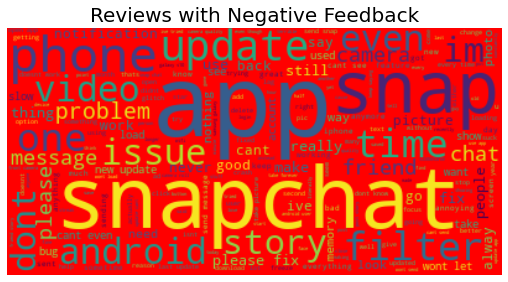

In [56]:
wordcloud_negative = WordCloud(background_color='red').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='green').generate(positive_reviews_str)
wordcloud_neutral = WordCloud(background_color='grey').generate(neutral_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Feedback',fontsize=20)

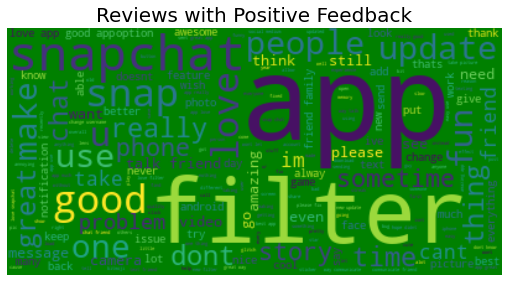

In [57]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Feedback',fontsize=20)
plt.show()

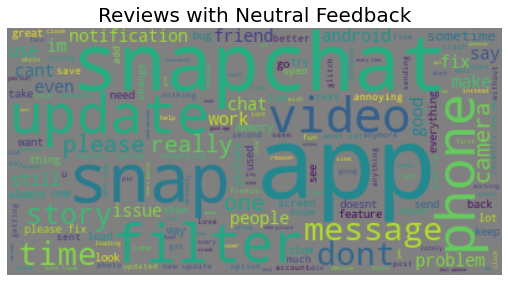

In [59]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_neutral,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Neutral Feedback',fontsize=20)
plt.show()

In [65]:
!pip install vaderSentiment

In [66]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Sentiment function
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [68]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Review']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.417,0.583,0.6369
1,0.000,0.263,0.737,0.9734
2,0.373,0.361,0.265,-0.2263
3,0.000,0.488,0.512,0.6369
4,0.000,0.755,0.245,0.3804


In [69]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Date,Rating,Helpful,Review,neg,neu,pos,compound
0,19-Nov-19,4,0,best camera chat app,0.000,0.417,0.583,0.6369
1,19-Nov-19,5,0,love love love app amazingly easy chat friend ...,0.000,0.263,0.737,0.9734
2,19-Nov-19,1,5,broken joke app nothing else,0.373,0.361,0.265,-0.2263


In [70]:

# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Date,Rating,Helpful,Review,neg,neu,pos,compound,Sentiment
0,19-Nov-19,4,0,best camera chat app,0.000,0.417,0.583,0.6369,Positive
1,19-Nov-19,5,0,love love love app amazingly easy chat friend ...,0.000,0.263,0.737,0.9734,Positive
2,19-Nov-19,1,5,broken joke app nothing else,0.373,0.361,0.265,-0.2263,Negative
3,19-Nov-19,5,0,one best texting call apps,0.000,0.488,0.512,0.6369,Positive
4,19-Nov-19,1,0,download profile get loaded there bugnot quite...,0.000,0.755,0.245,0.3804,Positive


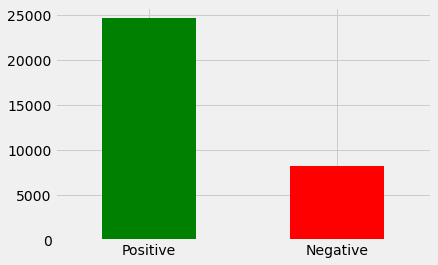

In [76]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['green','red']);